## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Simple Linear Regression

**นำเข้าข้อมูลไฟล์ bmi_and_life_expectancy**

In [2]:
data = pd.read_csv('bmi_and_life_expectancy.csv')

In [3]:
data

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083
...,...,...,...
158,Vanuatu,63.4,26.78926
159,West Bank and Gaza,74.1,26.57750
160,Vietnam,74.1,20.91630
161,Zambia,51.1,20.68321


**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

In [4]:
data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [5]:
data.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Life expectancy  163 non-null    float64
 2   BMI              163 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


**ใช้ pairplot เพื่อดูความสัมพันธ์ทุกคู่ตัวแปรใน data set** 

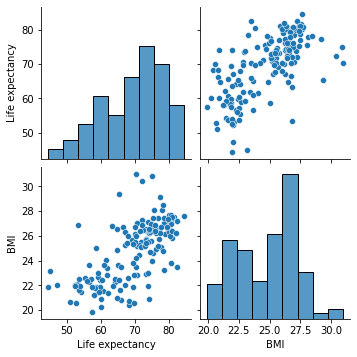

In [7]:
sns.pairplot(data)

**กำหนดตัวแปรต้น (X) : (BMI) และตัวแปรตาม (y) : (Life expectancy)**

In [8]:
X = data[['BMI']]
X

,BMI
0,20.62058
1,26.44657
2,24.59620
3,27.63048
4,22.25083
...,...
158,26.78926
159,26.57750
160,20.91630
161,20.68321


In [9]:
y = data['Life expectancy']
y

0      52.8
1      76.8
2      75.5
3      84.6
4      56.7
       ... 
158    63.4
159    74.1
160    74.1
161    51.1
162    47.3
Name: Life expectancy, Length: 163, dtype: float64

<!-- **Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101** -->

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=0`**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**สร้าง instance ของ class LinearRegression และทำการ fit model โดยใช้ fit()**

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ตรวจสอบ coefficients ของโมเดล**

In [12]:
model.coef_

array([2.90926417])

**Predicting Test Data ใช้โมเดลที่เราได้มาพยากรณ์ผลลัพธ์ test data โดยใช้ predict()**

In [13]:
y_pred = model.predict(X_test)

**วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred**

Text(0, 0.5, 'Y Predicted')

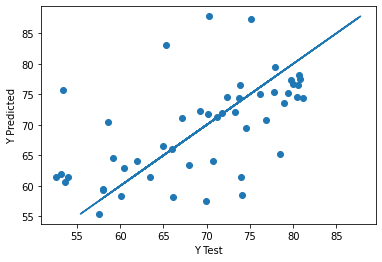

In [14]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')

**ประเมินความถูกต้องของโมเดล ด้วยการคำนวณค่า MAE, MSE, RMSE**

In [15]:
# Code here
mae = metrics.median_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 3.8629537387772643
Mean Square Error: 58.681157439964096
Root Mean Square Error : 7.660362748588613


In [16]:
y.describe()

count    163.000000
mean      69.666933
std        8.981933
min       44.500000
25%       63.450000
50%       71.800000
75%       76.500000
max       84.600000
Name: Life expectancy, dtype: float64

**จงเขียน สมการ regression ในรูปแบบ `y = w0 + w1x`**

In [17]:
print('y = {} + {}x'.format(model.intercept_, model.coef_[0]))

y = -2.3900315653152404 + 2.9092641664551318x


**ทดลอง predict ด้วยค่าใดก็ได้เพื่อดูผลลัพธ์ค่า `Life expectancy`**

In [18]:
model.predict([[10]])

array([26.7026101])

# Multiple Linear Regression

ตลาดอสังหาริมทรัพย์ในซิดนีย์และเมลเบิร์นนําเสนอโอกาสที่น่าสนใจสําหรับนักวิเคราะห์ข้อมูลในการวิเคราะห์และคาดการณ์ว่าราคาอสังหาริมทรัพย์จะเป็นไปอย่างไร การคาดการณ์ราคาอสังหาริมทรัพย์กําลังมีความสําคัญและเป็นประโยชน์มากขึ้นเพราะราคาอสังหาริมทรัพย์เป็นตัวบ่งชี้ที่ดีของทั้งสภาพตลาดโดยรวมและสุขภาพทางเศรษฐกิจของประเทศ

## Data Exploration
Data มีทั้งหมด 18 คอลัมน์ดังนี้

* date : วันที่ขาย
* price (target) : ราคาบ้าน (ตัวแปรตาม)
* bedrooms : จำนวนห้องนอน
* bathrooms : จำนวนห้องน้ำ
* sqft_living : พื่นที่บ้าน (ตารางฟุต)
* sqft_lot : ขนาดที่ดิน (ตารางฟุต)
* floors : จำนวนชั้น
* waterfront : วิวริมน้ำ
* view : จำนวนการดู
* condition : สภาพ
* sqft_above : พื้นที่ของบ้านนอกเหนือจากห้องใต้ดิน
* sqft_basement : พื้นที่ของห้องใต้ดิน
* yr_built : ปีที่สร้าง
* yr_renovated : ปีที่ปรับปรุง
* street : ถนน
* city : เมือง
* statezip : รหัสไปรษณีย์
* country : ประเทศ

**Import Data**

In [19]:
data = pd.read_csv('house_pricing.csv')

In [20]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**ใช้ head() descibe() info() เพื่อดูข้อมูลเบื้องต้น**

In [21]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [22]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

**ตรวจสอบ ค่าว่าง ว่ามีอยู่ในข้อมูลหรือไม่**

In [24]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**ใช้ .shape เพื่อดูขนาดของข้อมูล**

In [25]:
data.shape

(4600, 18)

**ตรวจสอบ แถวที่มีค่า = 0 ว่ามีอยู่ในฟีเจอร์ไหนบ้าง**

In [26]:
data[data == 0].count()

date                0
price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

**จากการตรวจสอบ แถวที่มีค่า = 0 ถามว่ามีบ้านกี่หลังในตัวอย่างที่ไม่มีราคา**

In [27]:
len(data[data['price']==0])

49

**DROP row ที่ราคา (price) = 0**

In [28]:
data.drop(data[data['price']==0].index, inplace=True)

In [29]:
len(data[data['price']==0])

0

**DROP ฟีเจอร์ที่ไม่ได้ใช้ (date, street, city, statezip, country) เนื่องจากมี data type เป็น Datetime / String**

In [30]:
data.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1, inplace=True)

In [31]:
#ตรวจสอบขนาดของข้อมูลหลังจาก drop row และ column
data.shape

(4551, 13)

## **Removing Outliers**

An outlier is a case that differs substantially from the main trend of the data.

<img src="https://drive.google.com/uc?id=1KzGPYgbqEgwhO0M6SC4qbq5DaPzHXogG" width="400px">

### price - removing outliers

เมื่อทำการวาด boxplot ของข้อมูล price จะพบว่ามีข้อมูลที่เป็น Outlier จำนวนมาก 

(มีค่ามากกว่า Quartile ที่ 3 เกินกว่า 1.5 เท่าของ Inter-quartile range)

*Note: Inter-quartile range = Quartile ที่ 3 - Quartile ที่ 1*

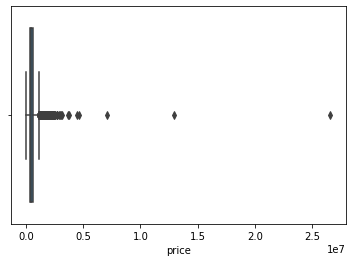

In [32]:
sns.boxplot(x=data['price'])

In [33]:
Q1_price = data.price.quantile(0.25)
Q3_price = data.price.quantile(0.75)
IQR_price =Q3_price- Q1_price

In [34]:
lower_limit_price= Q1_price - 1.5*IQR_price
upper_limit_price= Q3_price + 1.5*IQR_price

**DROP แถวข้อมูลที่มีราคา (price) เกินกว่า upper_limit_price และ น้อยกว่า lower_limit_price**

In [35]:
data_clean = data[(data.price>lower_limit_price)&(data.price<upper_limit_price)]

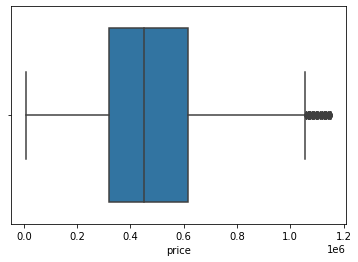

In [36]:
sns.boxplot(x=data_clean['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


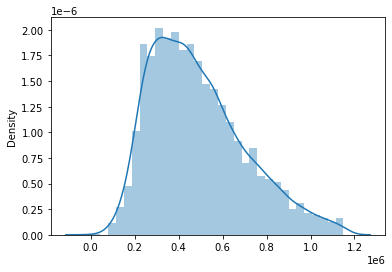

In [37]:
sns.distplot(x=data_clean['price'])

### sqft_living - removing outliers

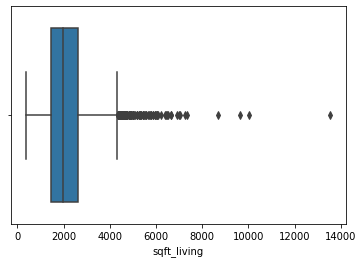

In [38]:
sns.boxplot(x=data['sqft_living'])

In [39]:
Q1_sqft_living = data.sqft_living.quantile(0.25)
Q3_sqft_living = data.sqft_living.quantile(0.75)
IQR_sqft_living =Q3_sqft_living- Q1_sqft_living
lower_limit_sqft_living= Q1_sqft_living - 1.5*IQR_sqft_living
upper_limit_sqft_living= Q3_sqft_living + 1.5*IQR_sqft_living

**แสดงแถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

In [40]:
data[(data['sqft_living']>upper_limit_sqft_living) | (data['sqft_living'] < lower_limit_sqft_living)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
107,1090000.0,4.0,2.50,4340,141570,2.5,0,0,3,4340,0,1992,0
122,2280000.0,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0
143,890000.0,4.0,4.25,4420,5750,2.0,0,0,3,3410,1010,2006,0
148,890000.0,5.0,3.50,4490,6000,2.0,0,0,3,3200,1290,2006,0
217,1870000.0,5.0,4.00,4510,15175,2.0,0,0,3,4510,0,1969,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4277,1240000.0,5.0,3.50,5430,10327,2.0,0,2,3,4010,1420,2007,0
4283,1550000.0,5.0,4.25,6070,171626,2.0,0,0,3,6070,0,1999,0
4398,195000.0,5.0,3.75,5340,10655,2.5,0,3,4,3740,1600,1912,1989
4400,692000.0,4.0,3.25,5010,34460,2.0,0,0,3,5010,0,1988,2000


**DROP แถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

In [41]:
data_clean = data_clean[(data_clean['sqft_living'] > lower_limit_sqft_living) & (data_clean['sqft_living'] < upper_limit_sqft_living)]

In [42]:
data_clean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.000000,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.000000,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.000000,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.000000,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.000000,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


### sqft_lot - removing outliers

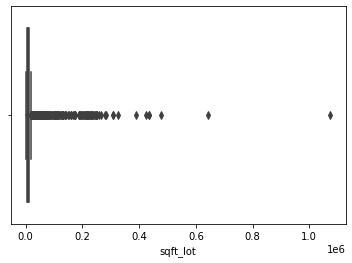

In [43]:
sns.boxplot(x=data['sqft_lot'])

**คำนวณ lower และ upper limits สำหรับ sqft_lot**

In [44]:
Q1_sqft_lot = data.sqft_lot.quantile(0.25)
Q3_sqft_lot = data.sqft_lot.quantile(0.75)
IQR_sqft_lot =Q3_sqft_lot- Q1_sqft_lot
lower_limit_sqft_lot= Q1_sqft_lot - 1.5*IQR_sqft_lot
upper_limit_sqft_lot= Q3_sqft_lot + 1.5*IQR_sqft_lot

**DROP แถวข้อมูลที่ sqft_living อาจจะเป็น outlier**

In [45]:
data_clean = data_clean[(data_clean['sqft_lot'] > lower_limit_sqft_lot) & (data_clean['sqft_lot'] < upper_limit_sqft_lot)]

### sqft_above - removing outliers

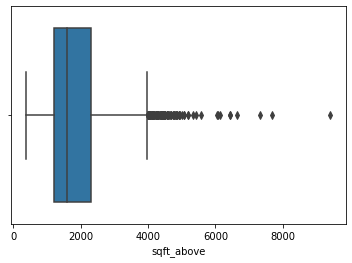

In [46]:
# Draw a boxplot
sns.boxplot(x=data['sqft_above'])
# Calculate lower and upper limits
Q1_sqft_above = data.sqft_above.quantile(0.25)
Q3_sqft_above = data.sqft_above.quantile(0.75)
IQR_sqft_above =Q3_sqft_above- Q1_sqft_above
lower_limit_sqft_above= Q1_sqft_above - 1.5*IQR_sqft_above
upper_limit_sqft_above= Q3_sqft_above + 1.5*IQR_sqft_above
# Drop rows with outlier data 
data_clean = data_clean[(data_clean['sqft_above'] > lower_limit_sqft_above) & (data_clean['sqft_above'] < upper_limit_sqft_above)]

### sqft_basement - removing outliers

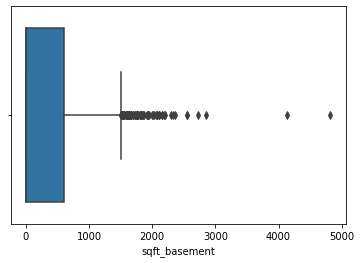

In [47]:
# Draw a boxplot
sns.boxplot(x=data['sqft_basement'])
# Calculate lower and upper limits
Q1_sqft_basement = data.sqft_basement.quantile(0.25)
Q3_sqft_basement = data.sqft_basement.quantile(0.75)
IQR_sqft_basement =Q3_sqft_basement- Q1_sqft_basement
lower_limit_sqft_basement= Q1_sqft_basement - 1.5*IQR_sqft_basement
upper_limit_sqft_basement= Q3_sqft_basement + 1.5*IQR_sqft_basement
# Drop rows with outlier data 
data_clean = data_clean[(data_clean['sqft_basement'] > lower_limit_sqft_basement) & (data_clean['sqft_basement'] < upper_limit_sqft_basement)]

In [48]:
data_clean.shape

(3758, 13)

### **Pearson Correlation Matrix**

In [49]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.210228,0.341126,0.445494,0.051347,0.152758,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,0.210228,1.000000,0.547612,0.596053,0.071138,0.176219,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,0.341126,0.547612,1.000000,0.757213,0.109331,0.489548,0.063310,0.205536,-0.120765,0.687208,0.295832,0.464239,-0.218160
sqft_living,0.445494,0.596053,0.757213,1.000000,0.213268,0.343513,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,0.051347,0.071138,0.109331,0.213268,1.000000,0.004245,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,0.152758,0.176219,0.489548,0.343513,0.004245,1.000000,0.015804,0.031980,-0.273786,0.522215,-0.255042,0.466691,-0.235969
waterfront,0.150083,-0.005521,0.063310,0.107758,0.017408,0.015804,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,0.242587,0.115080,0.205536,0.309343,0.072527,0.031980,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,0.038892,0.023018,-0.120765,-0.062529,0.000929,-0.273786,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483
sqft_above,0.380661,0.485672,0.687208,0.875657,0.219193,0.522215,0.072502,0.174629,-0.176549,1.000000,-0.037597,0.406436,-0.161281


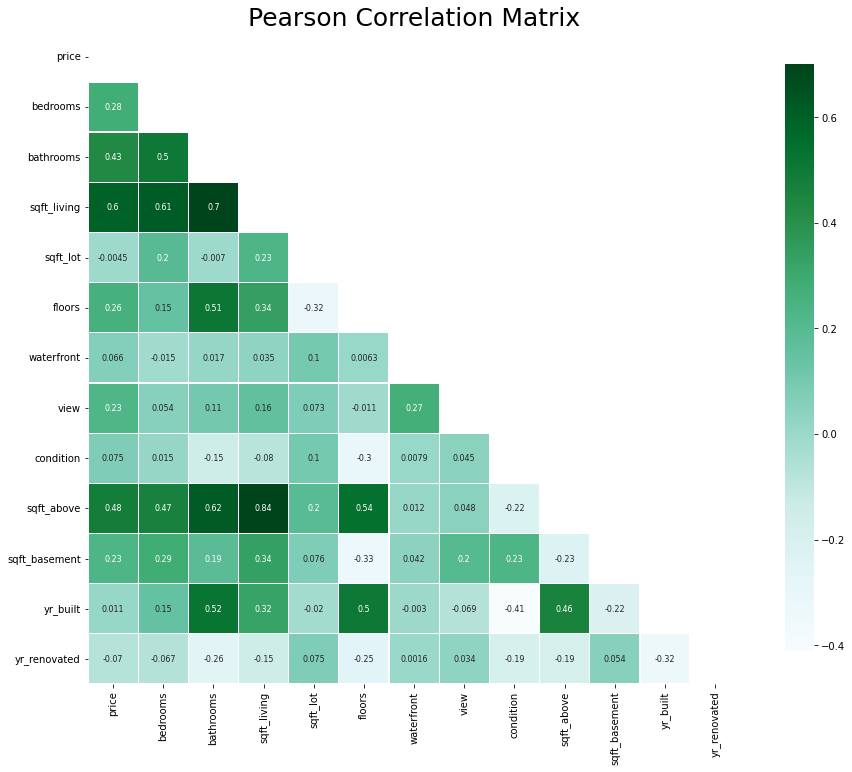

In [50]:
# data.corr()
mask = np.zeros_like(data_clean.corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(data_clean.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

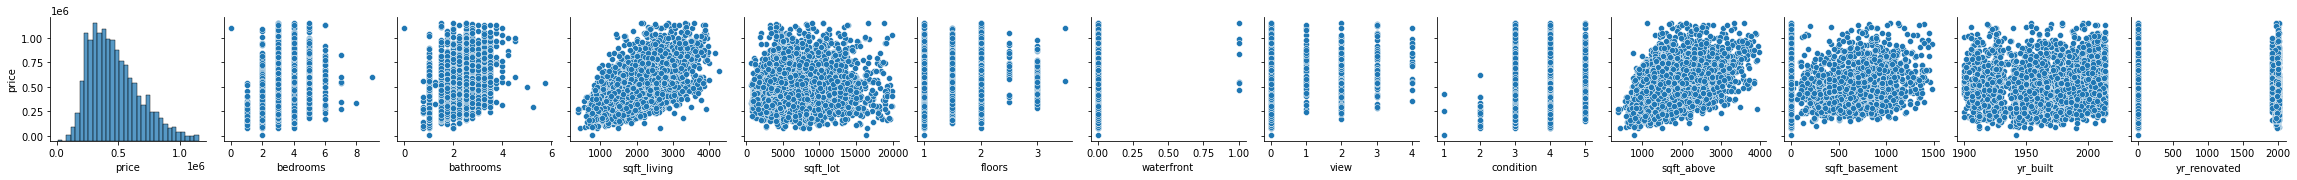

In [51]:
sns.pairplot(data=data_clean, y_vars=['price'])

#### **วิเคราะห์ข้อมูลเบื้องต้น**
เมื่อดูจาก Pearson Correlation Matrix สามารถบอกได้ว่าคุณสมบัติในบ้านสัมพันธ์กับราคาบ้านอย่างไร จะเห็นได้ว่าคุณสมบัติที่มีความสัมพันธ์มากที่สุดคือ 
- `sqft_living` ด้วยค่าสัมประสิทธิ์ **0.6** ซึ่งสมเหตุสมผล เพราะยิ่งพื้นที่ใช้สอยเยอะราคาก็สูงขึ้น
- คุณลักษณะที่สองที่มีความสัมพันธ์มากที่สุดคือ `sqft_above` ด้วย **0.48** 
 
อย่างไรก็ตามเนื่องด้วยคุณสมบัติทั้งสองตัวนี้มีความสัมพันธ์กันสูงมาก ด้วยค่าสัมประสิทธิ์ 0.84 อย่างไรก็ตามจึงไม่สามารถใช้ทั้ง `sqft_living` `sqft_above` ได้ - ปัญหา **Multicollinearity**

ดังนั้นแนวทางปฏิบัติที่ดีที่สุดคือการเลือกคุณสมบัติตัวใดตัวหนึ่ง ในกรณีนี้จะเลือก `sqft_living`

## Model Fitting

**กำหนดตัวแปรต้น (X) และตัวแปรตาม (y)**

In [52]:
X = data_clean.drop(['price','sqft_above'], axis=1)

In [53]:
y = data_clean['price']

<!-- **Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101** -->

**แบ่งข้อมูลเป็น 2 ชุดคือ Training Data กับ Testing Data โดยใช้คำสั่ง `train_test_split` โดยให้ `test_size=0.3` และ `random_state=101`**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
model = LinearRegression()

In [56]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ตรวจสอบ coefficients ของโมเดล**

In [57]:
model.coef_

array([-3.79513647e+04,  3.43290282e+04,  2.03961372e+02, -6.67703516e+00,
        4.13476532e+04,  6.24448448e+04,  3.60614546e+04,  3.17152843e+04,
       -8.26498705e+00, -1.81893321e+03,  5.80779033e+00])

In [58]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
bedrooms,-37951.364728
bathrooms,34329.028243
sqft_living,203.961372
sqft_lot,-6.677035
floors,41347.653159
waterfront,62444.844796
view,36061.454585
condition,31715.284271
sqft_basement,-8.264987
yr_built,-1818.933207


## Making Predictions
**Predicting Test Data ใช้โมเดลที่เราได้มาพยากรณ์ (predict) ผลลัพธ์**

In [59]:
y_pred = model.predict(X_test)

**วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred**

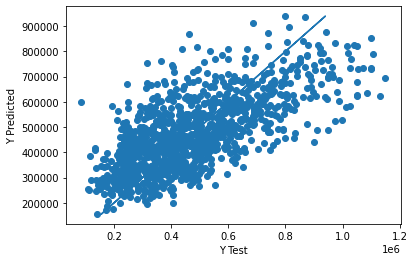

In [60]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

**ประเมินความถูกต้องของโมเดล ด้วยการคำนวณค่า MSE, RMSE, R2, MAPE**

In [61]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absulute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')
print(f"R2_score = {metrics.r2_score(y_test, y_pred)}")

Mean Absulute Error: 118010.51304334936
Mean Square Error: 22175092616.59502
Root Mean Square Error : 148913.03709412087
R2_score = 0.47424037944666386


In [62]:
y.describe()

count    3.758000e+03
mean     4.709236e+05
std      2.057531e+05
min      7.800000e+03
25%      3.100000e+05
50%      4.350000e+05
75%      5.924625e+05
max      1.150000e+06
Name: price, dtype: float64

## Formatting Data (Optional)

เนื่องจากข้อมูลใน feature `yr_built` และ `yr_renovated` เป็นปี คศ. จึงควรแก้ไขข้อมูลเพื่อให้เหมาะสมต่อการทำไปสร้าง model
- `yr_built` เปลี่ยนจากปี คศ. เป็นจำนวนปีนับจากปีปัจจุบัน
- `yr_renovate` ถ้าข้อมูลเป็น 0 (ไม่เคยถูก renovate) ให้แก้ไขค่ามาเป็นปีเดียวกับ `yr_built` จากนั้น เปลี่ยนจากปี คศ. เป็นจำนวนปีนับจากปีปัจจุบัน

In [63]:
from datetime import datetime

In [64]:
current_year = datetime.now().year
current_year

2021

In [65]:
new_X = X.copy()
new_X['age'] = current_year - new_X['yr_built']
new_X.loc[new_X['yr_renovated'] == 0, 'yr_renovated'] = new_X['yr_built']
new_X['age_renovated'] = current_year - new_X['yr_renovated']
new_X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,age,age_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,0,1955,2005,66,16
2,3.0,2.00,1930,11947,1.0,0,0,4,0,1966,1966,55,55
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1963,1963,58,58
4,4.0,2.50,1940,10500,1.0,0,0,4,800,1976,1992,45,29
5,2.0,1.00,880,6380,1.0,0,0,3,0,1938,1994,83,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,0,1954,1979,67,42
4596,3.0,2.50,1460,7573,2.0,0,0,3,0,1983,2009,38,12
4597,3.0,2.50,3010,7014,2.0,0,0,3,0,2009,2009,12,12
4598,4.0,2.00,2090,6630,1.0,0,0,3,1020,1974,1974,47,47
